[Mapping and Plotting Tools](https://geopandas.org/docs/user_guide/mapping.html)

In [1]:
import geopandas as gpd
%matplotlib widget

gdb = '/home/ggrl/geodatabase/'

In [2]:
countries = gpd.read_file('/usr/share/qgis/resources/data/world_map.gpkg',
                                 driver='GPKG',
                                 layer='countries')

In [ ]:
list(countries.NAME)

In [3]:
Brazil = countries[countries.NAME == 'Brazil']

<AxesSubplot:>

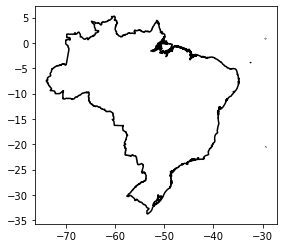

In [5]:
Brazil.boundary.plot(color='black')

In [6]:
Brazil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
Brazil.set_geometry('geometry')

,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
77,BR,Brazil,BR,BRA,BR,BRA,"MULTIPOLYGON (((-48.43456 -27.40472, -48.42658..."


## Abrindo as unidade litoestratigráficas mapeadas na escala 1:1.000.000 para iniciar a etapa de filtragem litológica

In [5]:
l_1kk = gpd.read_file(gdb+'geodatabase.gpkg',
                      driver='GPKG',
                      layer='l_1kk')

In [9]:
l_1kk.shape

(46715, 27)

### Reconhecendo as litologia grafitosas mapeadas na escala 1:1.000.000 podemos identificar quais cartas geológicas e suas escalas podemos trabalhar, portanto, faremos um filtro na coluna LEGENDA e LITOTIOPOS para agrupar apenas as geometrias que possuem valores grafitosos e com estas geometrias selecionaremos os mapas que as contém.

In [6]:
Litotipo_grafitico_l1kk = l_1kk[l_1kk['LITOTIPOS'].str.contains("graf")]

In [29]:
print(Litotipo_grafitico_l1kk.shape)
list(Litotipo_grafitico_l1kk.LITOTIPOS.head(10))

(29, 27)


['Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Metabasalto komatiítico, Metachert, Metakomatiíto, Metavulcânica félsica, Rocha metavulcânica intermediária, Serpentinito',
 'Filito grafítico, Metabasalto komatiítico, Metachert, Metakomatiíto, Metavulcânica félsica, Rocha metavulcânica intermediária, Serpentinito',
 'Filito, Filito grafítico, Metarenito, Metarritmito, Metassiltito, Mica xisto, Quartzito, Quartzito arcoseano, Xisto']

In [7]:
Litotipo_Grafita_xisto_l1kk = l_1kk[l_1kk['LITOTIPOS'].str.contains("Graf")]

In [28]:
print(Litotipo_Grafita_xisto_l1kk.shape)
list(Litotipo_Grafita_xisto_l1kk.LITOTIPOS.head(10))

(380, 27)


['Anfibolito, Grafita xisto, Metapelito, Quartzito',
 'Anfibolito, Grafita xisto, Metapelito, Quartzito',
 'Anfibolito, Grafita xisto, Metapelito, Quartzito',
 'Formação ferrífera bandada, Grafita xisto, Metachert, Rocha metassedimentar, Rocha metavulcânica ultramáfica, Serpentinito',
 'Formação ferrífera bandada, Grafita xisto, Metachert, Rocha metassedimentar, Rocha metavulcânica ultramáfica, Serpentinito',
 'Formação ferrífera bandada, Grafita xisto, Metachert, Rocha metassedimentar, Rocha metavulcânica ultramáfica, Serpentinito',
 'Biotita-anfibólio xisto, Biotita-quartzo xisto, Filito, Grafita xisto, Mármore calcítico, Mármore dolomítico, Metatufo, Quartzo-mica xisto, Rocha calcissilicática, Xisto carbonático',
 'Clorita xisto, Grafita xisto, Hornblenda gnaisse, Metacalcário, Muscovita quartzito, Muscovita-biotita xisto, Quartzito ferruginoso, Talco xisto',
 'Clorita xisto, Grafita xisto, Metachert, Metadacito, Metatufo, Xisto',
 'Biotita gnaisse, Gnaisse, Gondito, Grafita xisto, 

Foi necessário inserir a str 'Vazio' em celas que não continham valores para que a função de filtro funcionasse corretamente na coluna LEGENDA.

In [8]:
l_1kk = l_1kk.fillna('Vazio')

In [9]:
Legenda_grafitosa_l1kk = l_1kk[l_1kk['LEGENDA'].str.contains("graf")]

In [30]:
print(Legenda_grafitosa_l1kk.shape)
list(Legenda_grafitosa_l1kk.LEGENDA.head(10))

(1093, 27)


['Quartzito e sericita-quartzito, com subordinados sericita-andaluzita quartzito, quartzito ferruginoso, metapelito, pelito grafitoso, filito, itabirito e quartzo-arenito.',
 'Quartzito e sericita-quartzito, com subordinados sericita-andaluzita quartzito, quartzito ferruginoso, metapelito, pelito grafitoso, filito, itabirito e quartzo-arenito.',
 'Quartzito e sericita-quartzito, com subordinados sericita-andaluzita quartzito, quartzito ferruginoso, metapelito, pelito grafitoso, filito, itabirito e quartzo-arenito.',
 'Quartzito e sericita-quartzito, com subordinados sericita-andaluzita quartzito, quartzito ferruginoso, metapelito, pelito grafitoso, filito, itabirito e quartzo-arenito.',
 'Metarenito arcoseano, metarcóseo e grafita filito, com intercalações de metarenito e lente de mármore calcífero',
 'Sericita filito, com intercalações de filito e metarenito, algo grafitoso.',
 'Sericita filito, com intercalações de filito e metarenito, algo grafitoso.',
 'Metarenito arcoseano, metarc

In [10]:
Legenda_Grafita_l1kk = l_1kk[l_1kk['LEGENDA'].str.contains("Graf")]

In [32]:
print(Legenda_Grafita_l1kk.shape)
list(Legenda_Grafita_l1kk.LEGENDA.head())

(5, 27)


['Grafita xisto, clorita-sericita-quartzo xisto, grafita xisto, muscovita quartzo xisto, clorita-biotita xisto, muscovita quartzito, biotita xisto feldspático, clorita-carbonato xisto, xisto magnesiano, anfibólio xisto, formação ferrífera, talco-clori',
 'Grafita xisto, clorita-sericita-quartzo xisto, grafita xisto, muscovita quartzo xisto, clorita-biotita xisto, muscovita quartzito, biotita xisto feldspático, clorita-carbonato xisto, xisto magnesiano, anfibólio xisto, formação ferrífera, talco-clori',
 'Grafita xisto, grafita filito/filonito, (clorita)-(carbonato)-sericita xisto, formação ferrífera e metamafito',
 'Grafita-cianita xisto',
 'Grafita filito com níveis de quartzito e filito interstratificados.']

In [35]:
base = Brazil.boundary.plot(color='black',figsize=(12,12))

Legenda_grafitosa_l1kk.plot(ax=base,facecolor='grey')
#Legenda_Grafita_l1kk.plot(ax=base,facecolor='blue')

#Litotipo_Grafita_xisto_l1kk.plot(ax=base,facecolor='black')
#Litotipo_grafitico_l1kk.plot(ax=base,facecolor='red')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [16]:
Legenda_Grafitosa_l1kk = Legenda_Grafita_l1kk.append(Legenda_grafitosa_l1kk)

In [17]:
list(Legenda_Grafitosa_l1kk.MAPA.unique())

['Carta geológica da folha Goiás',
 'Carta geológica da folha Brasília',
 'Carta geológica da folha Salvador',
 'Carta geológica da folha Içá',
 'Carta geológica da folha Pico da Neblina',
 'Carta geológica da folha Corumbá',
 'Carta geológica da folha Cuiabá',
 'Carta geológica da folha Uruguaiana',
 'Carta geológica da folha Porto Alegre',
 'Carta geológica da folha Araguaia',
 'Carta geológica da folha Curitiba',
 'Carta geológica da folha Goiânia',
 'Carta geológica da folha Rio de Janeiro',
 'Carta geológica da folha Belo Horizonte',
 'Carta geológica da folha Rio São Francisco',
 'Carta geológica da folha Rio Doce',
 'Carta geológica da folha Aracaju',
 'Carta geológica da folha Jaguaribe',
 'Carta geológica da folha Macapá']

In [12]:
Litotipo_Grafitoso_l1kk = Litotipo_Grafita_xisto_l1kk.append(Litotipo_grafitico_l1kk)

In [15]:
list(Litotipo_Grafitoso_l1kk.MAPA.unique())

['Carta geológica da folha Uruguaiana',
 'Carta geológica da folha Porto Alegre',
 'Carta geológica da folha Goiás',
 'Carta geológica da folha Curitiba',
 'Carta geológica da folha Goiânia',
 'Carta geológica da folha Tocantins',
 'Carta geológica da folha Rio de Janeiro',
 'Carta geológica da folha Brasília',
 'Carta geológica da folha Belo Horizonte',
 'Carta geológica da folha Salvador',
 'Carta geológica da folha Aracaju',
 'Carta geológica da folha Rio Doce',
 'Carta geológica da folha Araguaia',
 'Carta geológica da folha Juruena']

In [14]:
base = Brazil.boundary.plot(color='black',figsize=(12,12))

Legenda_Grafitosa_l1kk.plot(ax=base,facecolor='grey')
Litotipo_Grafitoso_l1kk.plot(ax=base,facecolor='black')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [23]:
l_100k = gpd.read_file(gdb+'geodatabase.gpkg',
                       driver='GPKG',
                       layer='l_100k')

In [24]:
l_100k = l_100k.fillna('Vazio')

In [25]:
l_vazio_100k = l_100k[l_100k['LITOTIPOS'].str.contains("Vazio")]
print(l_vazio_100k.shape)
print(l_100k.shape)


(2033, 27)
(59268, 27)


In [26]:
litotipo_grafitico_l100k = l_100k[l_100k['LITOTIPOS'].str.contains("graf")]

legenda_grafitico_l100k = l_100k[l_100k['LEGENDA'].str.contains("graf")]

In [27]:
print(litotipo_grafitico_l100k.shape)
list(litotipo_grafitico_l100k.LITOTIPOS.head())

(383, 27)


['Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito, Filito grafítico, Quartzito, Quartzito ferruginoso']

In [28]:
print(legenda_grafitico_l100k.shape)
list(legenda_grafitico_l100k.LEGENDA.unique())

(2404, 27)


['Depósitos argilo-arenosos avermelhados com horizontes conglomeráticos localizados (cascalhos) e com desenvolvimento local de processos de laterização, representado por horizontes métricos de latossolos avermelhados. Ocorrem em terrenos topograficame',
 'Xistos pelíticos dominados por sillimanita-granada-biotita xisto, muscovita xisto, estaurolita-biotita-quartzo xisto e grafita xisto subordinado.',
 'Sericita quartzo xistos e xistos grafitosos intercalados com quartzo xistos e quartzitos. Com intercalações subordinadas de mármores.',
 'Quartzitos e muscovita quartzitos predominantes, com grafita xistos e metapelitos subordinados; metamorfismo na fácies xisto verde médio a anfibolito médio, localmente superior.',
 'Metapelitos, grafita xisto, xistos quartzo-feldspáticos, quartzitos, mármores, ardósias, anfibolitos e metavulcânicas intermediárias com metamorfismo nas fácies xisto-verde superior a anfibolito. Ocorrem lentes estreitas de quartzitos ferruginoso e',
 'Predomínio de mica xi

In [29]:
base = Brazil.boundary.plot(color='black',figsize=(12,12))

litotipo_grafitico_l100k.plot(ax=base,facecolor='grey')
legenda_grafitico_l100k.plot(ax=base,facecolor='black')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [57]:
mapas_leg_gr_100k = list(legenda_grafitico_l100k.MAPA.unique())
print(len(mapas_leg_gr_100k))

mapas_lito_gr_100k = list(litotipo_grafitico_l100k.MAPA.unique())
print(len(mapas_lito_gr_100k))

93
22


In [58]:
mapas_lito_gr_100k

['Carta geológica da folha Cerro Azul',
 'Carta geológica da folha Apiaí',
 'Carta geológica da folha Coromandel',
 'Carta geológica da folha Serra da Tiririca',
 'Carta geológica da folha Guarda Mor',
 'Carta geológica da folha Cabeceira Grande',
 'Carta geológica da folha Ribeirão Arrojado',
 'Carta geológica da folha Alpinópolis - UERJ',
 'Carta geológica da folha Patos de Minas',
 'Carta geológica da folha Paracatu',
 'Carta geológica da folha Arrenegado',
 'Carta geológica da folha Piumhi - UFRJ',
 'Carta geológica da folha Guapé - UERJ',
 'Carta geológica da folha Cacimba',
 'Carta geológica da folha Itararé',
 'Carta geológica da folha Serra da Aldeia',
 'Carta geológica da folha Brasilândia',
 'Carta geológica da folha Monte Carmelo',
 'Carta geológica da folha Lagamar',
 'Carta geológica da folha Caiana',
 'Carta geológica da folha Paranatinga',
 'Carta geológica da folha Monte Azul - UFMG']

In [59]:
list_gr_100k=mapas_lito_gr_100k
indice=0
for i in mapas_lito_gr_100k:
    print(i)
    list_gr_100k[indice] = l_100k[l_100k['MAPA'].str.contains("i")]
    indice+=1


Carta geológica da folha Cerro Azul
Carta geológica da folha Apiaí
Carta geológica da folha Coromandel
Carta geológica da folha Serra da Tiririca
Carta geológica da folha Guarda Mor
Carta geológica da folha Cabeceira Grande
Carta geológica da folha Ribeirão Arrojado
Carta geológica da folha Alpinópolis - UERJ
Carta geológica da folha Patos de Minas
Carta geológica da folha Paracatu
Carta geológica da folha Arrenegado
Carta geológica da folha Piumhi - UFRJ
Carta geológica da folha Guapé - UERJ
Carta geológica da folha Cacimba
Carta geológica da folha Itararé
Carta geológica da folha Serra da Aldeia
Carta geológica da folha Brasilândia
Carta geológica da folha Monte Carmelo
Carta geológica da folha Lagamar
Carta geológica da folha Caiana
Carta geológica da folha Paranatinga
Carta geológica da folha Monte Azul - UFMG


In [60]:
len(list_gr_100k)


22

In [61]:
list_gr_100k[0]

,ID_UNIDADE,SIGLA,HIERARQUIA,NOME,AMBIENTE_T,SUB_AMBIEN,SIGLA_PAI,NOME_PAI,LEGENDA,ESCALA,...,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN,geometry
0,3844,MP3rbm,Unidade,"Unidade Rio Branco, metamáfica",Vazio,Vazio,MP3rb,MP3rb - Formação Rio Branco,"Metagabro, metagabro-norito, metadiabásio, anf...",1:100.000,...,Mesoproterozóico,Mesoproterozóico,Esteniano,Esteniano,Landoveriano,Landoveriano,Vazio,0.001552,0.275637,"POLYGON ((-62.00000 -11.97996, -62.00000 -12.0..."
1,577,MP3_gamma_rp,Suíte intrusiva,Suíte intrusiva Rio Pardo,Magmatismo intraplaca,Intrusivas pós-orogênicas,Vazio,Vazio,"Monzo a sienogranitos cinza a róseo, equigranu...",1:100.000,...,Mesoproterozóico,Mesoproterozóico,Esteniano,Esteniano,Landoveriano,Landoveriano,Vazio,0.000595,0.140536,"POLYGON ((-62.00000 -11.88175, -62.00000 -11.9..."
2,3838,MP3maf,Unidade,"Unidade Migrantinópolis, anfibolito",Vazio,Vazio,MP3m,MP3m - Formação Migrantinópolis,Anfibolitos e metagabros cinza esverdeado escu...,1:100.000,...,Mesoproterozóico,Mesoproterozóico,Esteniano,Esteniano,Landoveriano,Landoveriano,Vazio,0.000012,0.013979,"POLYGON ((-62.00000 -11.83095, -62.00000 -11.8..."
3,3825,NP3pr,Formação,Formação Pedra Redonda,Vazio,Vazio,NP3pb,NP3pb - Grupo Pimenta Bueno,Paraconglomerado e arenito de granulometria gr...,1:100.000,...,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,C1pr,0.001222,0.219415,"POLYGON ((-62.05274 -11.69120, -62.05270 -11.6..."
4,3840,MP3mpg,Unidade,"Unidade Migrantinópolis, paragnaisse",Vazio,Vazio,MP3m,MP3m - Formação Migrantinópolis,Biotita paragnaisse e localmente metaturbidito...,1:100.000,...,Mesoproterozóico,Mesoproterozóico,Esteniano,Esteniano,Landoveriano,Landoveriano,Vazio,0.025622,3.861185,"POLYGON ((-62.26230 -11.61555, -62.26225 -11.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59263,3475,Q2lp,Não definida,Depósitos litorâneos praiais,Vazio,Vazio,Vazio,Vazio,"Areias quartzosas, de coloração cinza claro a ...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N4lp,0.000381,0.267003,"POLYGON ((-34.93211 -6.72307, -34.93244 -6.722..."
59264,3475,Q2lp,Não definida,Depósitos litorâneos praiais,Vazio,Vazio,Vazio,Vazio,"Areias quartzosas, de coloração cinza claro a ...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N4lp,0.000079,0.056966,"POLYGON ((-34.92143 -6.87818, -34.91930 -6.878..."
59265,1507,Q2a,Não definida,Depósitos aluvionares,Cobertura superficial,Vazio,Vazio,Vazio,Sedimentos sreno-argilosos aluvionares inconso...,1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N4a,0.000448,0.129121,"POLYGON ((-34.89744 -6.87870, -34.90015 -6.879..."
59266,1507,Q2a,Não definida,Depósitos aluvionares,Cobertura superficial,Vazio,Vazio,Vazio,Sedimentos sreno-argilosos aluvionares inconso...,1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N4a,0.000140,0.071196,"POLYGON ((-34.88181 -6.95547, -34.88241 -6.955..."


### Desafio desnecessário para provar meus conhecimentos com for loops:

In [540]:
lista_mapa = list(l_1kk.MAPA.unique())
print(len(lista_mapa))
lista_nome=[]

for mapa in lista_mapa:
    trash=0
    Mapa=[]
    for letra in mapa:
        if trash<25:
            trash+=1
        else:
            Mapa+=letra
    lista_nome += [''.join(Mapa)]

In [ ]:
lista_nome

In [510]:
folha=lista_nome
indice=0
for i in lista_nome:
    print(i)
    folha[indice] = l_1kk[l_1kk['MAPA'].str.contains(i)].dissolve('MAPA')
    indice+=1

Contamana
Javari
Rio Branco
Juruá
Içá
Pico da Neblina
Guaporé
Porto Velho
Purus
Manaus
Boa Vista
Corumbá
Cuiabá
Juruena
Tapajós
Santarém
Tumucumaque
Uruguaiana
Campo Grande
Asunción
Lagoa Mirim
Porto Alegre
Curitiba
Paranapanema
Goiânia
Goiás
Tocantins
Araguaia
Belém
Macapá
Iguape
Rio de Janeiro
Belo Horizonte
Brasília
Rio São Francisco
Teresina
São Luis
Vitória
Rio Doce
Salvador
Aracaju
Jaguaribe
Fortaleza
Recife
Natal


In [517]:
folha[31].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

tired for now

In [544]:
lista_mapa = list(l_100k.MAPA.unique())
lista_mapa

['Carta geológica da folha Paulo Saldanha',
 'Carta geológica da folha Rio Tanaru - SD.20-X-B-IV',
 'Carta geológica da folha Roncador',
 'Carta geológica da folha Rio Pardo',
 'Carta geológica da folha Pimenta Bueno',
 'Carta geológica da folha Serra da Providência',
 'Carta geológica da folha Ji Paraná',
 'Carta geológica da folha Vila Nova',
 'Carta geológica da folha Vila de Tepequém',
 'Carta geológica da folha Betânia - UFMT',
 'Carta geológica da folha Rio Escondido',
 'Carta geológica da folha Ilha do Porto',
 'Carta geológica da folha Porto Triunfo SD.20-X-B-V',
 'Carta geológica da folha NA-20-Z-D-III',
 'Carta geológica da folha Novo Paraíso',
 'Carta geológica da folha Santa Rita - UFMT',
 'Carta geológica da folha Santa Barbara - UFMT',
 'Carta geológica da folha Serra da Borda',
 'Carta geológica da folha Rio Novo',
 'Carta geológica da folha Rio Pindaituba - UFMT',
 'Carta geológica da folha Vila Oeste',
 'Carta geológica da folha Jauru - UFMT',
 'Carta geológica da folh

In [546]:
lista_nome=[]
for mapa in lista_mapa:
    trash=0
    Mapa=[]
    for letra in mapa:
        if trash<25:
            trash+=1
        else:
            Mapa+=letra
    lista_nome += [''.join(Mapa)]

In [547]:
len(lista_nome)

311

In [549]:
folha=lista_nome
indice=0
for i in lista_nome:
    print(i)
    folha[indice] = l_100k[l_100k['MAPA'].str.contains(i)].dissolve('MAPA')
    indice+=1

Paulo Saldanha
Rio Tanaru - SD.20-X-B-IV
Roncador
Rio Pardo
Pimenta Bueno
Serra da Providência
Ji Paraná
Vila Nova
Vila de Tepequém
Betânia - UFMT
Rio Escondido
Ilha do Porto
Porto Triunfo SD.20-X-B-V
NA-20-Z-D-III
Novo Paraíso
Santa Rita - UFMT
Santa Barbara - UFMT
Serra da Borda
Rio Novo
Rio Pindaituba - UFMT
Vila Oeste
Jauru - UFMT
Rio Branco - UFMT
Ilha Porto Escondido
Colônia São Lourenço
Fazenda Santa Otília
Aldeia Tomázia
Rio Perdido
Fazenda Margarida
Vila Campão
São Domingos
Rio Ratão
Cuiú-Cuiú
Cachoeira Seca
Vila Planalto
Ilha Mambuai
Uruá
Barão de Melgaço - UFMT
Rio Nhandu
Jardim do Ouro
Igrejinha - UNISINOS
Bagé
Aceguá
Lagoa da Meia Lua
Brasilândia
Cacimba
Paranatinga
Rio Braço Sul
Serra do Cachimbo
Curral de Pedras
Arroio Grande
Jaguarão
Passo São Diogo
Hulha Negra
Pinheiro Machado
Lavras do Sul
Santa Maria - RS
Sobradinho
Agudo
Três Passos
Frederico Westphalen
Matarazzo
Pelotas
Pedro Osório
Placa Nativa
Nova Xavantina
Rio Bacajá - UFPR
Gravataí - UFRGS
Sanclerlândia
Rio In

In [550]:
len(folha)

311